In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_excel(r"C:\Users\Nagham\Downloads\GP_2\AI model\final_data.xlsx")

X = data.drop(columns=["major"])
y = data["major"]

In [3]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, shuffle=True)

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
}

In [5]:
results = {}

for name, model in classifiers.items():
    print(f"\nTraining and Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training and Evaluating: Random Forest
Accuracy: 0.87
Confusion Matrix:
[[400   1   3   2   1   3   2   5   0   2   1   4   2   3   3   3   1   1
    2   1   2   0   3   4   0   4   6   3   2]
 [  2 378   0   1   5   2   3   1   2   0   6   1   3   0   3   2   4   0
    0   0   0   4   0   0   1   7   3   0   0]
 [  1   2 456   0   2   2   1   3   0   3   1   0   0   1   1   0   1   3
    0   1   2   1   0   1   1   2   1   1   0]
 [  4   0   3 418   0   1   1   3   1   2   0   0   4   2   2   1   1   0
    4   1   1   0   4   3   4   3   4   3   2]
 [  1   1   2   1 394   1   0   1   2   0   0   2   1   0   1   2   1   1
    0   1   2   0   7   0   3   1   0   1   3]
 [  0   2   3   0   3 411   3   2   1   0   5   5   1   4   1   5   0   2
    3   0   0   2   4   2   1   1   4   5   0]
 [  7   0   1   2   1   2 403   0   0   5   3   1   1   3   1   0   1   3
    1   1   3   0   3   3   2   2   0   0   2]
 [  7   5   2   3   7   4   3 351   1   0   4   2   4   6   7   4   6   5
    6 

Accuracy: 0.09
Confusion Matrix:
[[ 52  24   1  15  25  11   7   0  22   5  15  86  10  13   7   2   1  21
    6  11   8   9  14   0   1  17  59  15   7]
 [ 12  68   1  16  25   1   6   0  16   1   2  55   8   5   5   4   1  17
   35  15   2  37   0   4   0   8   9  38  37]
 [ 10  12   1   6  31  13   2   2  31   8  10  97  14   7  14   2   1  32
    8  14  18  17   6   2   5  12  76  19  17]
 [  6  39   2  54  28   6  18   0  38   4  11  56  11   3  11   0   0  30
    9  13  16  14  10   5   1  15  41  18  13]
 [ 20  10   0   8 102  12   1   0  15   0   5  76   1  13   7   1   0  39
    8   5   7  14   7   0   0   7  19  30  22]
 [ 16  37   3   3  44  42   7   1  19   8  12  87   1  12   5   6   0  41
    8   9   1  33   9   2   0  10  24  15  15]
 [  9  21   0  18  35  21  28   0  35   5  11  66   1   1   7   1   1  33
    7  30  13  35   9   6   1   4  19   7  27]
 [ 21  19   0   9  57   5   6   0  24   8   3  58   1   6  11   0   1  46
   30  10  10  15   4   1   3  16  30  29  24]

In [6]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Training the ANN model...")
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Training the ANN model...
Epoch 1/100


1339/1339 [==============================] - 5s 3ms/step - loss: 3.2157 - accuracy: 0.0920 - val_loss: 3.0903 - val_accuracy: 0.1337
Epoch 2/100
1339/1339 [==============================] - 4s 3ms/step - loss: 2.9586 - accuracy: 0.1700 - val_loss: 2.8702 - val_accuracy: 0.1885
Epoch 3/100
1339/1339 [==============================] - 3s 2ms/step - loss: 2.7055 - accuracy: 0.2391 - val_loss: 2.6520 - val_accuracy: 0.2485
Epoch 4/100
1339/1339 [==============================] - 4s 3ms/step - loss: 2.4873 - accuracy: 0.2959 - val_loss: 2.4640 - val_accuracy: 0.2975
Epoch 5/100
1339/1339 [==============================] - 3s 2ms/step - loss: 2.3061 - accuracy: 0.3478 - val_loss: 2.3587 - val_accuracy: 0.3327
Epoch 6/100
1339/1339 [==============================] - 3s 2ms/step - loss: 2.1644 - accuracy: 0.3866 - val_loss: 2.2275 - val_accuracy: 0.3684
Epoch 7/100
1339/1339 [==============================] - 3s 2ms/step - loss: 2.0440 - accuracy: 0.419

1339/1339 [==============================] - 4s 3ms/step - loss: 0.9354 - accuracy: 0.7195 - val_loss: 1.5067 - val_accuracy: 0.6149
Epoch 53/100
1339/1339 [==============================] - 3s 2ms/step - loss: 0.9240 - accuracy: 0.7217 - val_loss: 1.5557 - val_accuracy: 0.6058
Epoch 54/100
1339/1339 [==============================] - 3s 2ms/step - loss: 0.9143 - accuracy: 0.7274 - val_loss: 1.5038 - val_accuracy: 0.6166
Epoch 55/100
1339/1339 [==============================] - 3s 2ms/step - loss: 0.9082 - accuracy: 0.7280 - val_loss: 1.5368 - val_accuracy: 0.6128
Epoch 56/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.9007 - accuracy: 0.7298 - val_loss: 1.5491 - val_accuracy: 0.6121
Epoch 57/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.8917 - accuracy: 0.7298 - val_loss: 1.5123 - val_accuracy: 0.6198
Epoch 58/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.8897 - accuracy: 0.7314 - val_loss: 1.5410 - val_accuracy

In [7]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

419/419 [==============================] - 1s 1ms/step


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.65

Confusion Matrix:
[[303   3   5   8   4   4   5   7   3   7   6   3   3   2  11   7  12   4
    7   7   4   8   5   4   1  11  11   6   3]
 [  6 250   2   9   8   9   5   7   5   4   7   5   8   2  21   9  11   4
    7   1   3  12   4   2   4  10   5   5   3]
 [  6   5 329   7   2  11   3   7   2  11   2   4   3   2  11   5   3   7
   12   4  14   4   8   1   2   2  10   4   6]
 [  4   5   2 337   2   5  14   8   7   4   3   3   5   1  10   2   3   4
    5   5   4   4   6   4   9   9   5   0   2]
 [  8   6   5   5 268   0  14  12   5   7   2   3   4   2  14   8   0   6
    6   4   2   2   7   7   4  13   3   5   7]
 [  4   2   4   8   6 293   5  13   8   7   3   2   6   4  14  13   2   6
    3  10   4   5  11   8   3   6   8   6   6]
 [  8   1   5   7   4  10 292   7   3   8   2   7   0   3   3   6   7   5
   10   3   4   7   5  11   9  10   7   3   4]
 [  9  14   6  14  14   7  10 167  11  12   5   9  15   7  18   8   6  11
   12   5   4   7  12  10   5  23  10   8   

In [9]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

results_df.loc['ANN (Neural Network)'] = accuracy

print("\nComparison of Model Accuracies:")
print(results_df)


Comparison of Model Accuracies:
                      Accuracy
Random Forest         0.873310
Gradient Boosting     0.295809
Decision Tree         0.779562
Naive Bayes           0.090834
KNN                   0.801076
ANN (Neural Network)  0.647494


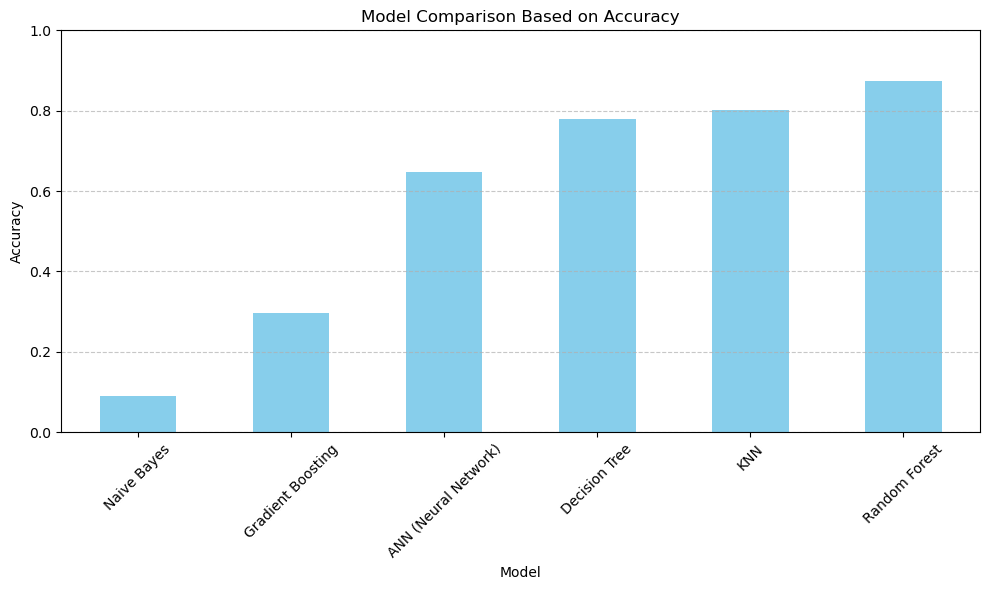

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
results_df['Accuracy'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Model Comparison Based on Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

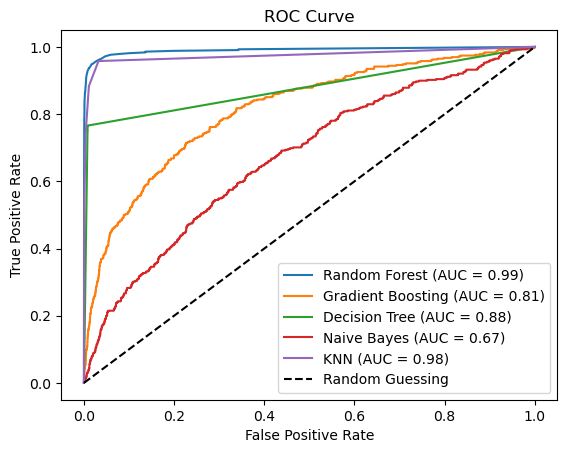

In [11]:
from sklearn.metrics import roc_curve, auc

for name, model in classifiers.items():
    y_pred_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix

y_pred_rf = classifiers['Random Forest'].predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(cm)

Confusion Matrix for Random Forest:
[[404   0   3   2   0   4   2   3   3   2   0   4   4   1   1   3   0   1
    4   1   2   2   3   4   0   5   3   1   2]
 [  2 384   0   2   4   1   2   3   1   0   5   0   1   0   5   1   3   0
    0   1   0   3   2   0   2   3   3   0   0]
 [  2   2 456   0   2   1   0   3   0   4   1   1   0   1   1   0   1   2
    0   1   2   1   0   1   0   2   2   1   0]
 [  5   2   3 411   0   1   0   6   2   3   1   0   2   2   3   3   3   0
    2   1   1   1   5   1   4   1   4   4   1]
 [  1   1   3   1 394   1   1   1   1   0   2   1   1   0   1   1   1   1
    0   0   3   0   6   0   2   2   0   1   3]
 [  0   3   3   0   4 411   3   2   1   0   5   2   1   1   2   5   1   4
    3   0   0   2   2   2   1   6   2   4   0]
 [  6   0   1   1   2   1 409   1   0   5   2   1   0   2   0   0   0   3
    1   0   2   0   3   5   2   2   0   0   2]
 [  5   6   4   2   7   4   4 339   1   0   4   2   4   7   6   8   5   7
    5   1   2   1   2   2   1  13   0   3  

In [43]:
custom_sample = pd.DataFrame({
    'TIPI1': [6],  # Extraverted, enthusiastic
    'TIPI2': [2],  # Critical, quarrelsome
    'TIPI3': [7],  # Dependable, self-disciplined
    'TIPI4': [3],  # Anxious, easily upset
    'TIPI5': [5],  # Open to new experiences, complex
    'TIPI6': [1],  # Reserved, quiet
    'TIPI7': [6],  # Sympathetic, warm
    'TIPI8': [4],  # Disorganized, careless
    'TIPI9': [5],  # Calm, emotionally stable
    'TIPI10': [2]  # Conventional, uncreative
})

print(custom_sample)

   TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  TIPI9  TIPI10
0      6      2      7      3      5      1      6      4      5       2


In [44]:
predicted_label = random_forest_model.predict(custom_sample)[0]

print(f"Predicted Major: {label_encoder.inverse_transform([predicted_label])[0]}")

Predicted Major: history
